<a href="https://colab.research.google.com/github/mcansoylu1/image-processing-scikit-image/blob/main/2_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from skimage import data
coins_image=data.coins()
astronaut_image=data.astronaut()
image=data.clock()
image2=data.page()
image3=data.coffee()
image_horse=data.horse()

In [3]:
def show_image(image,title='Image',c_map_type='gray'):
  plt.imshow(image,cmap=c_map_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

In [4]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

##Edge Detection

1) Sobel

2) Gaussian

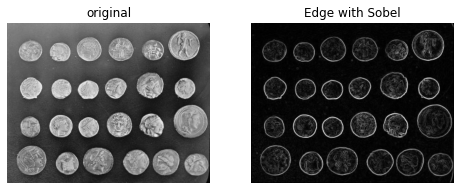

In [ ]:
#edge detection with sobel
#first need to be grayscaled
from skimage.filters import sobel
edge_sobel=sobel(coins_image)
plot_comparison(coins_image,edge_sobel,"Edge with Sobel")

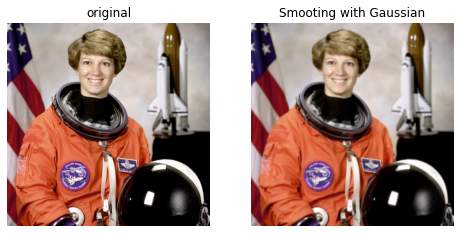

In [ ]:
#smoothing with gauessian
from skimage.filters import gaussian
gaussian_image=gaussian(astronaut_image,multichannel=True)
#if image is not colored multichannel should set to be False
plot_comparison(astronaut_image,gaussian_image,"Smooting with Gaussian")

##Contrast Enhancement

The contrast is the difference between the maximum and minimum pixel intensity in the image.

There are three types of histogram equalization:

1) Standard histogram equalization

2) Adaptive histogram equalization

3) Contrast Limited Adaptive Histogram Equalization (CLAHE)

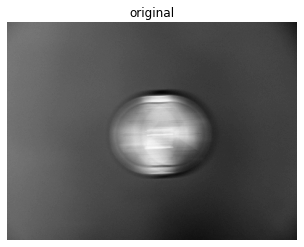

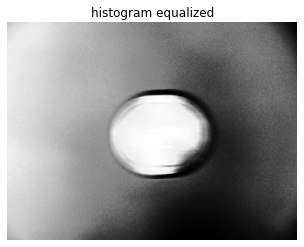

In [ ]:
from skimage import exposure
image_eq=exposure.equalize_hist(image)
show_image(image,'original')
show_image(image_eq,'histogram equalized')

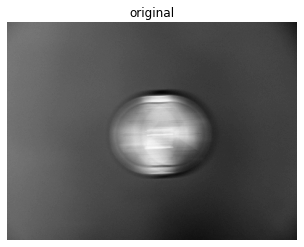

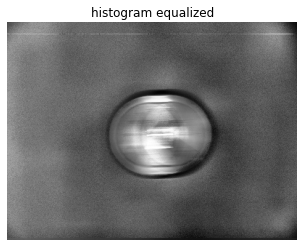

In [ ]:
#clahe
image_adateq=exposure.equalize_adapthist(image,clip_limit=0.03) 
#increase in clip_limit causes more contrast
show_image(image,'original')
show_image(image_adateq,'histogram equalized')

##Transformations
*rotating

*resizing


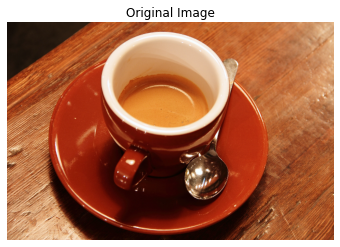

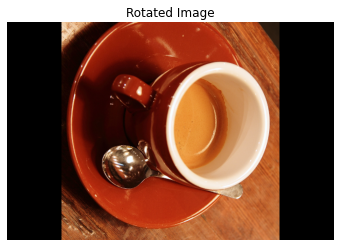

In [ ]:
from skimage.transform import rotate
image_rotated=rotate(image3,-90)
show_image(image3,'Original Image')
show_image(image_rotated,'Rotated Image')
#+ values of angle rotates counter-clockwise
#- values of angle rotates clockwise

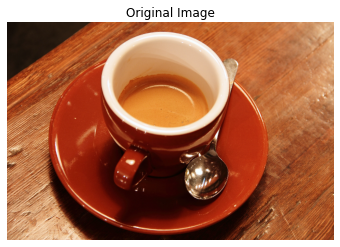

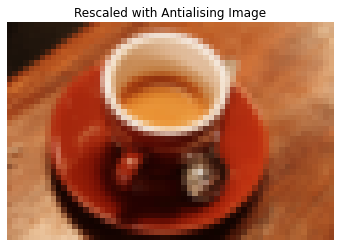

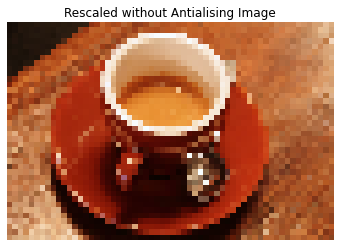

In [ ]:
#rescaling
from skimage.transform import rescale
image_rescaled_withantialising=rescale(image3,1/10,anti_aliasing=True,multichannel=True)
image_rescaled_withoutantialising=rescale(image3,1/10,anti_aliasing=False,multichannel=True)
show_image(image3,'Original Image')
show_image(image_rescaled_withantialising,'Rescaled with Antialising Image')
show_image(image_rescaled_withoutantialising,'Rescaled without Antialising Image')

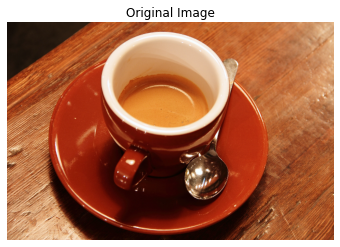

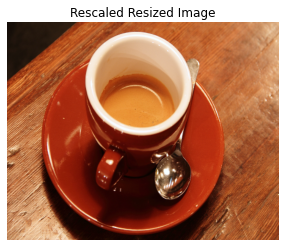

In [ ]:
#resize
from skimage.transform import resize
height=400
width=500

image_resized=resize(image3,(height,width),anti_aliasing=True)
show_image(image3,'Original Image')
show_image(image_resized,'Rescaled Resized Image')

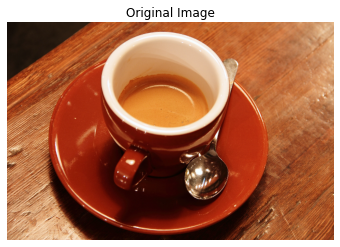

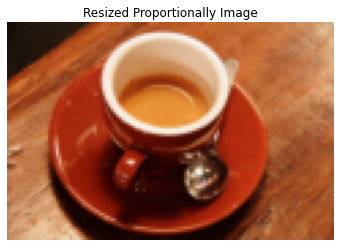

In [ ]:
#resizing proportionally
from skimage.transform import resize
height=image3.shape[0]/5
width=image3.shape[1]/5

image_resized_proped=resize(image3,(height,width), anti_aliasing=True)
show_image(image3,'Original Image')
show_image(image_resized_proped,'Resized Proportionally Image')


##Morphological filtering
Binay regions produced by simple thresholding can be distorted by noise and texture. Morphological filtering operations try to remove these imperfections by accounting for the from and structure of the objects in the image.

Basic Morphological filtering operations are:

1)Dilation

Dilataion adds pixels to the boundaries of objects in an image.

2)Erosion

Erosion removes pixels on object boundaries.

In [ ]:
#shapes
from skimage import morphology

square=morphology.square(4)
square

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

In [ ]:
rectangle=morphology.rectangle(4,2)
rectangle

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

In [ ]:
#erosion
from skimage import morphology

selem=morphology.rectangle(12,6)
eroded_image=morphology.binary_erosion(image_horse, selem=selem)

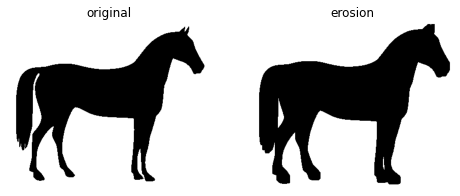

In [ ]:
plot_comparison(image_horse,eroded_image,'erosion')

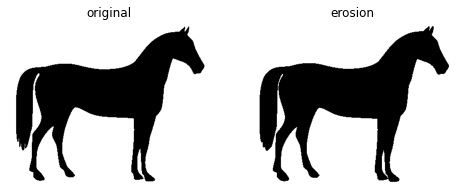

In [ ]:
#default selem
eroded_image_defaultselem=morphology.binary_erosion(image_horse)
plot_comparison(image_horse,eroded_image_defaultselem,'erosion')

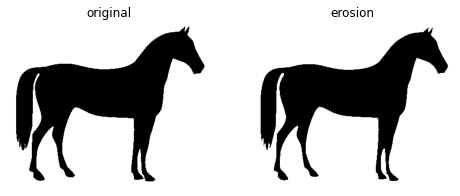

In [ ]:
dilated_image=morphology.binary_dilation(image_horse)
plot_comparison(image_horse,dilated_image,'dilation')